#DEEP LEARNING

##Drive İzni ve Kütüphanelerin Yüklenmesi

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/fer2013.csv")

Mounted at /gdrive


##Görüntü(x) Verilerinin Ön İşlemesi

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


train (28709, 48, 48, 1)
PublicTest (3589, 48, 48, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


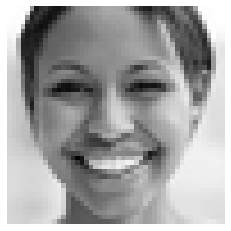

In [ ]:

#data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/fer2013.csv")

#x_train verileri için ön işleme

np.unique(data["Usage"].values.ravel()) #ravel ile array haline getirilip unique ile tekrar deden değerler tek bir değer olarak alınır
train_data = data[data.Usage == "Training"] #train_data'ya usage bölümü Training olan datalar eklenir

train_pixels = train_data.pixels.str.split(" ").tolist() #tek bir string halinde bulunan sayısal değerler split ile boşuklara göre ayrılır ve liste haine getirilir.
train_pixels = pd.DataFrame(train_pixels, dtype=int)

train_images = train_pixels.values
train_images = train_images.astype(np.float)

x_train = train_images.reshape(-1,48,48,1)

print("train", x_train.shape)

#x_test verileri için ön işleme

np.unique(data["Usage"].values.ravel())
test_data = data[data.Usage == "PublicTest"]

test_pixels = test_data.pixels.str.split(" ").tolist()
test_pixels = pd.DataFrame(test_pixels, dtype=int)

test_images = test_pixels.values
test_images = test_images.astype(np.float)

x_test = test_images.reshape(-1,48,48,1)

print("PublicTest", x_test.shape)


def show(img):
    show_image = img.reshape(48,48)
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

show(train_images[445])




##Duygu Değerlerinin Ön İşlenmesi

In [ ]:
train_labels_flat = train_data["emotion"].values.ravel() #duygu değerleri çekiliyor train için(train data'dan)
train_labels_count = np.unique(train_labels_flat).shape[0]#kaç sınıf olduğu bulunuyor train için

test_labels_flat = test_data["emotion"].values.ravel() #duygu değerleri çekiliyor test için(test data'dan)
test_labels_count = np.unique(test_labels_flat).shape[0]


def den_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot #değerler 0-1 olarak ifade ediliyor(ortak adım)

y_train = den_one_hot(train_labels_flat, train_labels_count)#y_train için fonksiyonda yerine koyma işlemi yapılıyor
y_train = y_train.astype(np.uint8)

y_test = den_one_hot(test_labels_flat, test_labels_count) #y_test için fonksiyonda yerine koyma işlemi yapılıyor
y_test = y_test.astype(np.uint8)



print("y_train",y_train)
print("y_test",y_test)

y_train [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
y_test [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


##Eğitim Modelinin Oluşturulması

data shape: (35887, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (Non

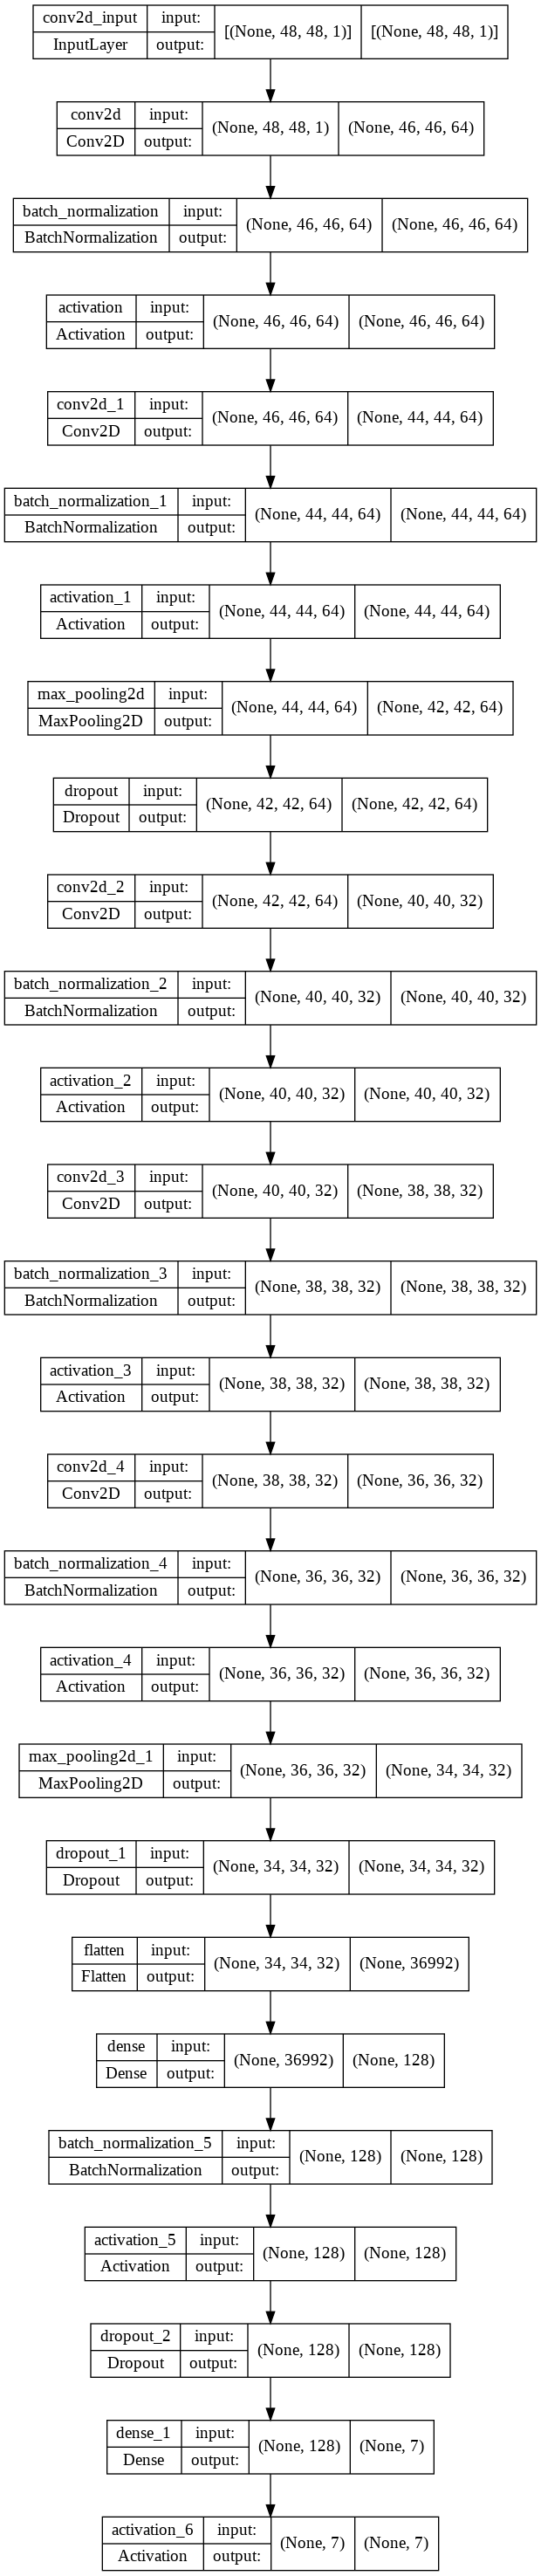

In [ ]:
data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/fer2013.csv")

print("data shape:",data.shape)


model = Sequential()
# 1. katman
model.add(Conv2D(64,3,data_format="channels_last", kernel_initializer="he_normal",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))


# 2. katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides =1))
model.add(Dropout(0.1))

# 3. katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

# 4. katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

# 5. katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides =1))
model.add(Dropout(0.1))

#Tam Bağlantı Katmanı
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))





# çıkış katmanı
model.add(Dense(7))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)








##En başarılı katmanın kaydedilmesi

In [ ]:
#En başarılı ağırlıkları kaydet

checkpointer = ModelCheckpoint(filepath="/gdrive/MyDrive/Colab Notebooks/face_model.h5",verbose=1, save_best_only=True)

epochs=10
batchsize=100

#Fit etme
hist=model.fit(x_train, y_train,
               epochs=epochs,
               shuffle=True,
               batch_size=batchsize,
               validation_data=(x_test,y_test),
               verbose=2)


model.save("/gdrive/MyDrive/Colab Notebooks/new_model.h5")




"""

model_json = model.to_json()
with open("/gdrive/MyDrive/Colab Notebooks/face_model.h5","w") as json_file:
  json_file.write(model_json)
"""


Epoch 1/10
288/288 - 20s - loss: 1.4816 - accuracy: 0.4372 - val_loss: 1.3858 - val_accuracy: 0.4692 - 20s/epoch - 71ms/step
Epoch 2/10
288/288 - 8s - loss: 1.2086 - accuracy: 0.5411 - val_loss: 1.3414 - val_accuracy: 0.5029 - 8s/epoch - 27ms/step
Epoch 3/10
288/288 - 8s - loss: 1.0729 - accuracy: 0.5972 - val_loss: 1.2080 - val_accuracy: 0.5442 - 8s/epoch - 27ms/step
Epoch 4/10
288/288 - 8s - loss: 0.9593 - accuracy: 0.6427 - val_loss: 1.2639 - val_accuracy: 0.5333 - 8s/epoch - 27ms/step
Epoch 5/10
288/288 - 8s - loss: 0.8607 - accuracy: 0.6830 - val_loss: 1.2370 - val_accuracy: 0.5564 - 8s/epoch - 27ms/step
Epoch 6/10
288/288 - 8s - loss: 0.7424 - accuracy: 0.7329 - val_loss: 1.3407 - val_accuracy: 0.5589 - 8s/epoch - 27ms/step
Epoch 7/10
288/288 - 8s - loss: 0.6313 - accuracy: 0.7731 - val_loss: 1.3163 - val_accuracy: 0.5667 - 8s/epoch - 27ms/step
Epoch 8/10
288/288 - 8s - loss: 0.5148 - accuracy: 0.8242 - val_loss: 1.4251 - val_accuracy: 0.5531 - 8s/epoch - 27ms/step
Epoch 9/10
288

'\n\nmodel_json = model.to_json()\nwith open("/gdrive/MyDrive/Colab Notebooks/face_model.h5","w") as json_file:\n  json_file.write(model_json)\n'

##En başarılı ağırlığı kullanmak için load ile yükleme yapıyoruz

In [ ]:
model_best = keras.models.load_model("/gdrive/MyDrive/Colab Notebooks/new_model.h5")

In [ ]:
image_path = "/gdrive/MyDrive/Colab Notebooks/data/images.jpeg"
test_image_original = image.load_img(image_path)

test_image_original = image.load_img(image_path) # orjinal renkli görüntü

test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
test_data = image.img_to_array(test_image)
print(test_data)
test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results

[[[ 89.]
  [ 91.]
  [ 93.]
  ...
  [100.]
  [ 99.]
  [ 94.]]

 [[ 90.]
  [ 91.]
  [ 93.]
  ...
  [102.]
  [ 99.]
  [ 95.]]

 [[ 90.]
  [ 92.]
  [ 92.]
  ...
  [103.]
  [ 99.]
  [ 96.]]

 ...

 [[ 74.]
  [ 73.]
  [ 71.]
  ...
  [ 68.]
  [ 67.]
  [ 65.]]

 [[ 72.]
  [ 73.]
  [ 71.]
  ...
  [ 66.]
  [ 65.]
  [ 65.]]

 [[ 71.]
  [ 72.]
  [ 70.]
  ...
  [ 64.]
  [ 63.]
  [ 64.]]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[1.8094844e-06, 2.0458925e-08, 8.1253749e-01, 1.9140803e-03,
        1.8545131e-01, 9.3824070e-05, 1.4523735e-06]], dtype=float32)

##Sonuçlar için grafik gösterimi

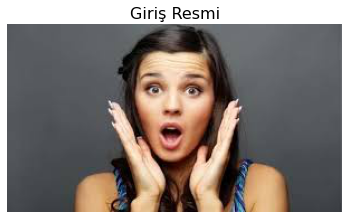

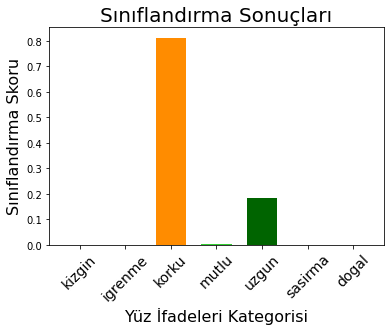

Sınıflandırma sonucu en yüksek oranla: korku


In [ ]:
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  #bar genişliği

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']

# test resmimizi çizdirelim

plt.imshow(test_image_original)
plt.title('Giriş Resmi', fontsize=16)
plt.axis('off')
plt.show()

#sonuçlarımızı renklendirelim

for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Sınıflandırma Sonuçları", fontsize=20)
plt.xlabel("Yüz İfadeleri Kategorisi",fontsize=16)
plt.ylabel("Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])